# Weather Data Analysis: 
## We are analysing the Edinburgh weather data for the year 2015

# Load the libraries

In [1]:
import pandas as pd
from dateutil import parser, rrule
from datetime import datetime, time, date
import time

# Read the data

In [2]:
df = pd.read_csv('IEDINBUR6_weather.csv')
print(df.head())
print(df.columns)
print(df.shape)                                        # (101443, 18) 


   Unnamed: 0                 Time  TemperatureC  DewpointC  PressurehPa  \
0           0  2015-01-01 00:00:00          10.3        4.5       1001.9   
1           1  2015-01-01 00:06:00          10.2        4.4       1001.9   
2           2  2015-01-01 00:11:00          10.2        4.4       1001.9   
3           3  2015-01-01 00:16:00          10.2        4.4       1001.9   
4           4  2015-01-01 00:21:00          10.2        4.6       1002.3   

  WindDirection  WindDirectionDegrees  WindSpeedKMH  WindSpeedGustKMH  \
0            SW                   236           9.0              11.9   
1            SW                   226           6.9               7.9   
2           SSW                   202           7.2              15.8   
3           SSW                   202           7.9              11.9   
4         South                   174           4.3               7.9   

   Humidity  HourlyPrecipMM  Conditions  Clouds  dailyrainMM  \
0        67             0.0         NaN 

# Rename the variables to small meaningful names + convert types as needed!

In [3]:
df['temp'] = df['TemperatureC'].astype(float)                                     # In degree Celsius
df['rain'] = df['HourlyPrecipMM'].astype(float)                                   # In mm                            
df['total_rain'] = df['dailyrainMM'].astype(float)                                # In mm
df['date'] = df['DateUTC'].apply(parser.parse)
df['humidity'] = df['Humidity'].astype(float)
df['wind_direction'] = df['WindDirectionDegrees']
df['wind'] = df['WindSpeedKMH']


# Extract specific data and also specify appropriate column sequence

In [4]:
df_new = df.loc[:, ['date', 'station', 'temp', 'rain', 'total_rain', 'humidity', 'wind']]
print(df_new)
print(df_new.shape)                          # (101443, 7)  

# Observe that the data is recorded approximately every 5 min. 

                      date    station   temp  rain  total_rain  humidity  \
0      2015-01-01 00:00:00  IEDINBUR6   10.3   0.0         0.0      67.0   
1      2015-01-01 00:06:00  IEDINBUR6   10.2   0.0         0.0      67.0   
2      2015-01-01 00:11:00  IEDINBUR6   10.2   0.0         0.0      67.0   
3      2015-01-01 00:16:00  IEDINBUR6   10.2   0.0         0.0      67.0   
4      2015-01-01 00:21:00  IEDINBUR6   10.2   0.0         0.0      68.0   
5      2015-01-01 00:26:00  IEDINBUR6   10.2   0.0         0.0      68.0   
6      2015-01-01 00:31:00  IEDINBUR6   10.1   0.0         0.0      69.0   
7      2015-01-01 00:36:00  IEDINBUR6   10.1   0.0         0.0      69.0   
8      2015-01-01 00:41:00  IEDINBUR6   10.1   0.0         0.0      70.0   
9      2015-01-01 00:47:00  IEDINBUR6   10.1   0.0         0.0      70.0   
10     2015-01-01 00:52:00  IEDINBUR6   10.1   0.0         0.0      70.0   
11     2015-01-01 00:57:00  IEDINBUR6   10.0   0.0         0.0      70.0   
12     2015-

# Data pruning and cleaning

In [5]:
# Ensure that we are handling data only for 2015. 
df_new = df_new[(df_new['date'] >= datetime(2015,1,1)) & (df_new['date'] <= datetime(2015,12,31))]    # Dates: YYYY,MM,DD
print(df_new.shape)                # Rows reduced from (101443, 7) ---> (101169, 7)


# There are few readings where the parameter 'rain' is negative (-2539.7) where the actual values are missing. 
# lets get rid of such readings     

(101169, 7)


In [6]:
# First get the original row count
print(df_new.shape)                   # (101169, 7)  

# Get rid of the missing values i.e. values of 'rain' which are negative 
df_new = df_new[df_new.rain > -500]
print(df_new.head())

# Now get the final row count
print(df_new.shape)                  # (101168, 7)   

# i.e. there was a single row where the reading for 'rain' was missing

(101169, 7)
                 date    station  temp  rain  total_rain  humidity  wind
0 2015-01-01 00:00:00  IEDINBUR6  10.3   0.0         0.0      67.0   9.0
1 2015-01-01 00:06:00  IEDINBUR6  10.2   0.0         0.0      67.0   6.9
2 2015-01-01 00:11:00  IEDINBUR6  10.2   0.0         0.0      67.0   7.2
3 2015-01-01 00:16:00  IEDINBUR6  10.2   0.0         0.0      67.0   7.9
4 2015-01-01 00:21:00  IEDINBUR6  10.2   0.0         0.0      68.0   4.3
(101168, 7)


In [7]:
# Assign "Day" to every "Date" entry i.e. Fetch the Date exclusive
df_new['day'] = df_new['date'].apply(lambda x: x.date())
df_new.head()

# NOTE: the apply() is used to apply a function to a DataFrame axis.

,date,station,temp,rain,total_rain,humidity,wind,day
0,2015-01-01 00:00:00,IEDINBUR6,10.3,0.0,0.0,67.0,9.0,2015-01-01
1,2015-01-01 00:06:00,IEDINBUR6,10.2,0.0,0.0,67.0,6.9,2015-01-01
2,2015-01-01 00:11:00,IEDINBUR6,10.2,0.0,0.0,67.0,7.2,2015-01-01
3,2015-01-01 00:16:00,IEDINBUR6,10.2,0.0,0.0,67.0,7.9,2015-01-01
4,2015-01-01 00:21:00,IEDINBUR6,10.2,0.0,0.0,68.0,4.3,2015-01-01


In [8]:
# Fetch the time, day of week and hour of each timestamp 
df_new['time_of_day'] = df['date'].apply(lambda x: x.time())        
df_new['day_of_week'] = df['date'].apply(lambda x: x.weekday())     # Monday == 0 and Sunday == 6
df_new['hour_of_day'] = df['date'].apply(lambda x: x.hour)          # Ranges from [0-23] 
print(df_new.head())

# NOTE: All these datetime operations were possible, as the datatype of 'date' column is [Timestamp].
print(type(df_new.date[0]))

                 date    station  temp  rain  total_rain  humidity  wind  \
0 2015-01-01 00:00:00  IEDINBUR6  10.3   0.0         0.0      67.0   9.0   
1 2015-01-01 00:06:00  IEDINBUR6  10.2   0.0         0.0      67.0   6.9   
2 2015-01-01 00:11:00  IEDINBUR6  10.2   0.0         0.0      67.0   7.2   
3 2015-01-01 00:16:00  IEDINBUR6  10.2   0.0         0.0      67.0   7.9   
4 2015-01-01 00:21:00  IEDINBUR6  10.2   0.0         0.0      68.0   4.3   

          day time_of_day  day_of_week  hour_of_day  
0  2015-01-01    00:00:00            3            0  
1  2015-01-01    00:06:00            3            0  
2  2015-01-01    00:11:00            3            0  
3  2015-01-01    00:16:00            3            0  
4  2015-01-01    00:21:00            3            0  
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [9]:
# To view monthly patterns, mark the 'Month' for each entry
df_new['month'] = df['date'].apply(lambda x: x.month)         # Ranges from [1-12]
print(df_new.head())


                 date    station  temp  rain  total_rain  humidity  wind  \
0 2015-01-01 00:00:00  IEDINBUR6  10.3   0.0         0.0      67.0   9.0   
1 2015-01-01 00:06:00  IEDINBUR6  10.2   0.0         0.0      67.0   6.9   
2 2015-01-01 00:11:00  IEDINBUR6  10.2   0.0         0.0      67.0   7.2   
3 2015-01-01 00:16:00  IEDINBUR6  10.2   0.0         0.0      67.0   7.9   
4 2015-01-01 00:21:00  IEDINBUR6  10.2   0.0         0.0      68.0   4.3   

          day time_of_day  day_of_week  hour_of_day  month  
0  2015-01-01    00:00:00            3            0      1  
1  2015-01-01    00:06:00            3            0      1  
2  2015-01-01    00:11:00            3            0      1  
3  2015-01-01    00:16:00            3            0      1  
4  2015-01-01    00:21:00            3            0      1  


In [10]:
# Verify if each time stamp is on a working day
df_new['working_day'] = (df_new['day_of_week'] >=0) & (df_new['day_of_week'] <= 4)
print(df_new.head())

# NOTE: In pandas we always make use of the bitwise operators: |(or), & (and), in place of the conventional "and" and "or" operators. 

                 date    station  temp  rain  total_rain  humidity  wind  \
0 2015-01-01 00:00:00  IEDINBUR6  10.3   0.0         0.0      67.0   9.0   
1 2015-01-01 00:06:00  IEDINBUR6  10.2   0.0         0.0      67.0   6.9   
2 2015-01-01 00:11:00  IEDINBUR6  10.2   0.0         0.0      67.0   7.2   
3 2015-01-01 00:16:00  IEDINBUR6  10.2   0.0         0.0      67.0   7.9   
4 2015-01-01 00:21:00  IEDINBUR6  10.2   0.0         0.0      68.0   4.3   

          day time_of_day  day_of_week  hour_of_day  month  working_day  
0  2015-01-01    00:00:00            3            0      1         True  
1  2015-01-01    00:06:00            3            0      1         True  
2  2015-01-01    00:11:00            3            0      1         True  
3  2015-01-01    00:16:00            3            0      1         True  
4  2015-01-01    00:21:00            3            0      1         True  


In [11]:
# Classify the time into morning and evening office times. 
# Assume morning office time:------------------> (8:15-9:00 AM) 
# Assume evening office time:------------------> (5:15-6:00 PM)
 
from datetime import time               # Again import esp if you have imported datetime's time and the separate time library.
df_new['morning'] = (df_new['time_of_day'] >= time(8, 15)) & (df_new['time_of_day'] <= time(9, 0))
df_new['evening'] = (df_new['time_of_day'] >= time(17, 15)) & (df_new['time_of_day'] <= time(18, 0))
print(df_new.head())


                 date    station  temp  rain  total_rain  humidity  wind  \
0 2015-01-01 00:00:00  IEDINBUR6  10.3   0.0         0.0      67.0   9.0   
1 2015-01-01 00:06:00  IEDINBUR6  10.2   0.0         0.0      67.0   6.9   
2 2015-01-01 00:11:00  IEDINBUR6  10.2   0.0         0.0      67.0   7.2   
3 2015-01-01 00:16:00  IEDINBUR6  10.2   0.0         0.0      67.0   7.9   
4 2015-01-01 00:21:00  IEDINBUR6  10.2   0.0         0.0      68.0   4.3   

          day time_of_day  day_of_week  hour_of_day  month  working_day  \
0  2015-01-01    00:00:00            3            0      1         True   
1  2015-01-01    00:06:00            3            0      1         True   
2  2015-01-01    00:11:00            3            0      1         True   
3  2015-01-01    00:16:00            3            0      1         True   
4  2015-01-01    00:21:00            3            0      1         True   

   morning  evening  
0    False    False  
1    False    False  
2    False    False  
3   

In [12]:
# Mark if there is any rain at all
df_new['raining'] = df_new['rain'] > 0.0
print(df_new.head())


                 date    station  temp  rain  total_rain  humidity  wind  \
0 2015-01-01 00:00:00  IEDINBUR6  10.3   0.0         0.0      67.0   9.0   
1 2015-01-01 00:06:00  IEDINBUR6  10.2   0.0         0.0      67.0   6.9   
2 2015-01-01 00:11:00  IEDINBUR6  10.2   0.0         0.0      67.0   7.2   
3 2015-01-01 00:16:00  IEDINBUR6  10.2   0.0         0.0      67.0   7.9   
4 2015-01-01 00:21:00  IEDINBUR6  10.2   0.0         0.0      68.0   4.3   

          day time_of_day  day_of_week  hour_of_day  month  working_day  \
0  2015-01-01    00:00:00            3            0      1         True   
1  2015-01-01    00:06:00            3            0      1         True   
2  2015-01-01    00:11:00            3            0      1         True   
3  2015-01-01    00:16:00            3            0      1         True   
4  2015-01-01    00:21:00            3            0      1         True   

   morning  evening  raining  
0    False    False    False  
1    False    False    False  

In [13]:
# Mark if the person is subjected to 'wet cycling' if its the morning office travel time and if its raining @ that time
df_new['wet_cycle'] = (df_new['working_day']) & ((df_new['morning'] & df_new['raining'])|
                                                 (df_new['evening'] & df_new['raining']))
print(df_new.head())


                 date    station  temp  rain  total_rain  humidity  wind  \
0 2015-01-01 00:00:00  IEDINBUR6  10.3   0.0         0.0      67.0   9.0   
1 2015-01-01 00:06:00  IEDINBUR6  10.2   0.0         0.0      67.0   6.9   
2 2015-01-01 00:11:00  IEDINBUR6  10.2   0.0         0.0      67.0   7.2   
3 2015-01-01 00:16:00  IEDINBUR6  10.2   0.0         0.0      67.0   7.9   
4 2015-01-01 00:21:00  IEDINBUR6  10.2   0.0         0.0      68.0   4.3   

          day time_of_day  day_of_week  hour_of_day  month  working_day  \
0  2015-01-01    00:00:00            3            0      1         True   
1  2015-01-01    00:06:00            3            0      1         True   
2  2015-01-01    00:11:00            3            0      1         True   
3  2015-01-01    00:16:00            3            0      1         True   
4  2015-01-01    00:21:00            3            0      1         True   

   morning  evening  raining  wet_cycle  
0    False    False    False      False  
1    Fal

### Now the data is clean and ready for analysis

# DATA SUMMARIZATION AND AGGREGATION:
In order to gain insight from the data, we will aggregate/ group over days and months. 

In [14]:
# Fetch the column names
print(df_new.columns)


# Focus on the working days which had rains during office commute hours.
series_wetCycling = df_new[df_new['working_day'] == True].groupby('day')['wet_cycle'].any()     # any() returns a boolean whether any element is True over requested axis
df_wetCycling = pd.DataFrame(series_wetCycling).reset_index()
print(df_wetCycling)


Index(['date', 'station', 'temp', 'rain', 'total_rain', 'humidity', 'wind',
       'day', 'time_of_day', 'day_of_week', 'hour_of_day', 'month',
       'working_day', 'morning', 'evening', 'raining', 'wet_cycle'],
      dtype='object')
            day  wet_cycle
0    2015-01-01       True
1    2015-01-02      False
2    2015-01-05      False
3    2015-01-06       True
4    2015-01-07       True
5    2015-01-08      False
6    2015-01-09       True
7    2015-01-12       True
8    2015-01-13      False
9    2015-01-14      False
10   2015-01-15      False
11   2015-01-16      False
12   2015-01-19      False
13   2015-01-20      False
14   2015-01-21      False
15   2015-01-22      False
16   2015-01-23       True
17   2015-01-26      False
18   2015-01-27      False
19   2015-01-28      False
20   2015-01-29      False
21   2015-01-30      False
22   2015-02-02      False
23   2015-02-03      False
24   2015-02-04      False
25   2015-02-05      False
26   2015-02-06      False
27   2015

In [15]:
# Instead of the individual dates [too much granularity], lets group by months 
# First extract the months from the date
df_wetCycling['month'] = df_wetCycling['day'].apply(lambda x: x.month)
print(df_wetCycling.head())

# Now group on months
df_monthWise_wetCycling = df_wetCycling.groupby('month')['wet_cycle'].value_counts().reset_index(name='days')
df_monthWise_wetCycling


          day  wet_cycle  month
0  2015-01-01       True      1
1  2015-01-02      False      1
2  2015-01-05      False      1
3  2015-01-06       True      1
4  2015-01-07       True      1


,month,wet_cycle,days
0,1,False,16
1,1,True,6
2,2,False,19
3,2,True,1
4,3,False,18
5,3,True,4
6,4,False,21
7,4,True,1
8,5,False,16
9,5,True,5


In [16]:
# Rename the columns
df_monthWise_wetCycling.rename(columns={'wet_cycle':'rainy'}, inplace=True)
print(df_monthWise_wetCycling.head())

# Replace the 'rainy' column values to something meaningful
df_monthWise_wetCycling.replace({'rainy':{True:"wet", False:"dry"}}, inplace=True)
print("\n\n", df_monthWise_wetCycling.head())

# Use the 'month' column and create a new column 'month_names'
import calendar
df_monthWise_wetCycling['month_name'] = df_monthWise_wetCycling['month'].apply(lambda x: calendar.month_abbr[x])
print("\n\n", df_monthWise_wetCycling.head())


   month  rainy  days
0      1  False    16
1      1   True     6
2      2  False    19
3      2   True     1
4      3  False    18


    month rainy  days
0      1   dry    16
1      1   wet     6
2      2   dry    19
3      2   wet     1
4      3   dry    18


    month rainy  days month_name
0      1   dry    16        Jan
1      1   wet     6        Jan
2      2   dry    19        Feb
3      2   wet     1        Feb
4      3   dry    18        Mar


# Get aggregate stats for each day in the dataset

In [17]:
# View the original DataFrame
print(df_new.head())

# Use aggregator pipeline syntax [Similar to that of MongoDB]
df_rainyDays = df_new.groupby('day').agg({
                                            'rain': {'rain':lambda x: (x > 0.0).any(),
                                                     'rain_amount':'sum'}, 
                                            'total_rain':{'total_rain':'max'},
                                            'wet_cycle':{'wet_cycle':'any'}
                                         })

df_rainyDays.reset_index(inplace=True)    # Resets the index back to integer index.
print(df_rainyDays)         


                 date    station  temp  rain  total_rain  humidity  wind  \
0 2015-01-01 00:00:00  IEDINBUR6  10.3   0.0         0.0      67.0   9.0   
1 2015-01-01 00:06:00  IEDINBUR6  10.2   0.0         0.0      67.0   6.9   
2 2015-01-01 00:11:00  IEDINBUR6  10.2   0.0         0.0      67.0   7.2   
3 2015-01-01 00:16:00  IEDINBUR6  10.2   0.0         0.0      67.0   7.9   
4 2015-01-01 00:21:00  IEDINBUR6  10.2   0.0         0.0      68.0   4.3   

          day time_of_day  day_of_week  hour_of_day  month  working_day  \
0  2015-01-01    00:00:00            3            0      1         True   
1  2015-01-01    00:06:00            3            0      1         True   
2  2015-01-01    00:11:00            3            0      1         True   
3  2015-01-01    00:16:00            3            0      1         True   
4  2015-01-01    00:21:00            3            0      1         True   

   morning  evening  raining  wet_cycle  
0    False    False    False      False  
1    Fal

C:\Users\parul\Anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:4658: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [18]:
# Print the DataFrame
print(df_rainyDays.head())                          # We observe that the columns have levels....eliminate it


          day   rain             total_rain wet_cycle
                rain rain_amount total_rain wet_cycle
0  2015-01-01   True        52.2        4.6      True
1  2015-01-02   True        52.0        4.8     False
2  2015-01-03  False         0.0        0.0     False
3  2015-01-04  False         0.0        0.0     False
4  2015-01-05  False         0.0        0.0     False


In [19]:
# Drop a level of the columns
df_rainyDays.columns = df_rainyDays.columns.droplevel(level=0)
print(df_rainyDays.head())


                rain  rain_amount  total_rain  wet_cycle
0  2015-01-01   True         52.2         4.6       True
1  2015-01-02   True         52.0         4.8      False
2  2015-01-03  False          0.0         0.0      False
3  2015-01-04  False          0.0         0.0      False
4  2015-01-05  False          0.0         0.0      False


In [20]:
# Check the datatype of the column 'rain'
print(type(df_rainyDays.rain[0]))                              # [numpy.bool_]

# Incase it isnt a boolean, Convert the datatype to boolean
df_rainyDays['rain'] = df_rainyDays['rain'].astype(bool)

# Check the datatype again
print(df_rainyDays.head())


<class 'numpy.bool_'>
                rain  rain_amount  total_rain  wet_cycle
0  2015-01-01   True         52.2         4.6       True
1  2015-01-02   True         52.0         4.8      False
2  2015-01-03  False          0.0         0.0      False
3  2015-01-04  False          0.0         0.0      False
4  2015-01-05  False          0.0         0.0      False


In [21]:
# The first column doesnt have a label - Assign it a label say 'date'
df_rainyDays.rename(columns={"":'date'}, inplace=True)
print(df_rainyDays.head())


         date   rain  rain_amount  total_rain  wet_cycle
0  2015-01-01   True         52.2         4.6       True
1  2015-01-02   True         52.0         4.8      False
2  2015-01-03  False          0.0         0.0      False
3  2015-01-04  False          0.0         0.0      False
4  2015-01-05  False          0.0         0.0      False


In [22]:
# Further equip this DataFrame with the actual number of Hours/day it rained. 
# Print the original DatFrame
print(df_new.head())

temp = df_new.groupby(['day', 'hour_of_day'])['raining'].any()
print("\n\n\n\n", temp.head())

                 date    station  temp  rain  total_rain  humidity  wind  \
0 2015-01-01 00:00:00  IEDINBUR6  10.3   0.0         0.0      67.0   9.0   
1 2015-01-01 00:06:00  IEDINBUR6  10.2   0.0         0.0      67.0   6.9   
2 2015-01-01 00:11:00  IEDINBUR6  10.2   0.0         0.0      67.0   7.2   
3 2015-01-01 00:16:00  IEDINBUR6  10.2   0.0         0.0      67.0   7.9   
4 2015-01-01 00:21:00  IEDINBUR6  10.2   0.0         0.0      68.0   4.3   

          day time_of_day  day_of_week  hour_of_day  month  working_day  \
0  2015-01-01    00:00:00            3            0      1         True   
1  2015-01-01    00:06:00            3            0      1         True   
2  2015-01-01    00:11:00            3            0      1         True   
3  2015-01-01    00:16:00            3            0      1         True   
4  2015-01-01    00:21:00            3            0      1         True   

   morning  evening  raining  wet_cycle  
0    False    False    False      False  
1    Fal

In [23]:
# Further refine this Series 'temp' to calculate the total number of hours it rained on the particular day
temp = temp.groupby(level=[0]).sum().reset_index() 
print(temp.head())

# Rename the columns
temp.rename(columns={'raining':'hours_raining'}, inplace=True)
print(temp.head())


          day  raining
0  2015-01-01     10.0
1  2015-01-02      8.0
2  2015-01-03      0.0
3  2015-01-04      0.0
4  2015-01-05      0.0
          day  hours_raining
0  2015-01-01           10.0
1  2015-01-02            8.0
2  2015-01-03            0.0
3  2015-01-04            0.0
4  2015-01-05            0.0


In [24]:
# Merge the 2 dataframes viz...temp and df_rainyDays on the common column 'date' in df_rainyDays
df_rainyDays = df_rainyDays.merge(temp, left_on='date', right_on='day', how='left')
print(df_rainyDays.head())


         date   rain  rain_amount  total_rain  wet_cycle         day  \
0  2015-01-01   True         52.2         4.6       True  2015-01-01   
1  2015-01-02   True         52.0         4.8      False  2015-01-02   
2  2015-01-03  False          0.0         0.0      False  2015-01-03   
3  2015-01-04  False          0.0         0.0      False  2015-01-04   
4  2015-01-05  False          0.0         0.0      False  2015-01-05   

   hours_raining  
0           10.0  
1            8.0  
2            0.0  
3            0.0  
4            0.0  


In [25]:
# observe that the columns 'date' and 'day' are redundant. Eliminate this
df_rainyDays.drop('day', axis=1, inplace=True)
print(df_rainyDays.head())


         date   rain  rain_amount  total_rain  wet_cycle  hours_raining
0  2015-01-01   True         52.2         4.6       True           10.0
1  2015-01-02   True         52.0         4.8      False            8.0
2  2015-01-03  False          0.0         0.0      False            0.0
3  2015-01-04  False          0.0         0.0      False            0.0
4  2015-01-05  False          0.0         0.0      False            0.0


# Conclusion:

In [26]:
# Print Summary Stats
print("In the year 2015, there were {} rainy days of {} at {}".format(df_rainyDays['rain'].sum(), len(df_rainyDays), "Edinburgh"))

print("\nIt was wet while cycling {} working days of {} at {}".format(df_wetCycling['wet_cycle'].sum(), 
                                                                      len(df_wetCycling), "Edinburgh"))

print("\nYou get wet cycling {} % of the time!!".format((100/len(df_wetCycling)) * df_wetCycling['wet_cycle'].sum()))

In the year 2015, there were 194 rainy days of 364 at Edinburgh

It was wet while cycling 44 working days of 260 at Edinburgh

You get wet cycling 16.923076923076923 % of the time!!


# Visualization using Pandas and Seaborn
## seaborn is a high level visualization library that is a level above matplotlib

   month rainy  days month_name
0      1   dry    16        Jan
1      1   wet     6        Jan
2      2   dry    19        Feb
3      2   wet     1        Feb
4      3   dry    18        Mar


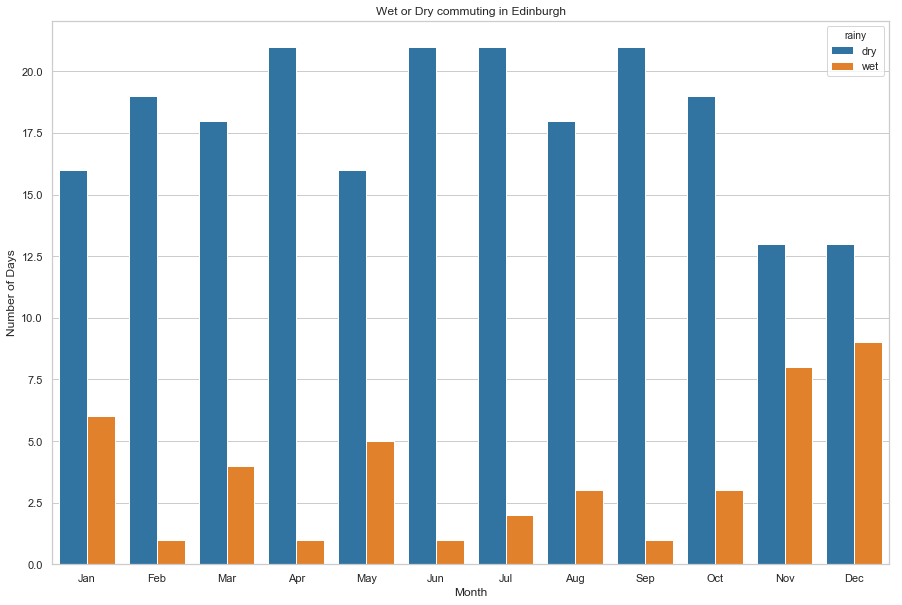

In [27]:
# Barchart of monthly summarized rainfall data contained in the DataFrame: df_monthWise_wetCycling
print(df_monthWise_wetCycling.head())     # Source of data

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=1)

sns.barplot(x='month_name', 
            y='days', 
            hue='rainy',                                                                 # ASK!
            data=df_monthWise_wetCycling.sort_values(['month', 'rainy']))

plt.xlabel('Month')
plt.ylabel('Number of Days')
plt.title('Wet or Dry commuting in Edinburgh')
plt.show()


## Inference: The above graph represents the number of monthly days cyclist have to face rains during office commute hours in Eidenburgh. 

# Heatmaps for Rainfall and Rainy hours of the day
### Heatmaps are easily drawn using 'calmap' python library. We need to explicitly install it in Anaconda, using the command:- 'pip install calmap'. Its used to plot Pandas time series data sampled by day in a heatmap per calendar year, similar to GitHub’s contributions plot, using matplotlib.

### this package will not be installed via 'conda install calmap' or via conda-forge.

### The version we installed is calmap-0.0.7


In [28]:
import calmap
# We will use the df_rainyDays as the data source
print(df_rainyDays.head())

# Observe that the index here is the default integer value

         date   rain  rain_amount  total_rain  wet_cycle  hours_raining
0  2015-01-01   True         52.2         4.6       True           10.0
1  2015-01-02   True         52.0         4.8      False            8.0
2  2015-01-03  False          0.0         0.0      False            0.0
3  2015-01-04  False          0.0         0.0      False            0.0
4  2015-01-05  False          0.0         0.0      False            0.0


In [29]:
# Create a temp copy and change the index such that it has the DatetimeIndex on 'date' column. 
#temp = df_rainyDays.copy().set_index(pd.DatetimeIndex(df_rainyDays['date']))
temp = df_rainyDays.copy()                # Shallow Copy
print(id(temp))                           # 2477616726816
print(id(df_rainyDays))                   # 2477547155408...They are different.

print(id(temp.date[0]))                   # 2477510147696
print(id(df_rainyDays.date[0]))           # 2477510147696....They are the same...hence Shallow Copy 

temp.set_index('date', inplace=True)      # The Type of index is [object]
temp.index = pd.to_datetime(temp.index)   # This step is needed to convert the [object] index to [DatetimeIndex]
print(temp.head())                        # Now our data is coverted into a time series.  
print(temp.index)
                                     
# Observe that the index has been set to the 'date' field. 

1756579461832
1756477320440
1756477050384
1756477050384
             rain  rain_amount  total_rain  wet_cycle  hours_raining
date                                                                
2015-01-01   True         52.2         4.6       True           10.0
2015-01-02   True         52.0         4.8      False            8.0
2015-01-03  False          0.0         0.0      False            0.0
2015-01-04  False          0.0         0.0      False            0.0
2015-01-05  False          0.0         0.0      False            0.0
DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10',
               ...
               '2015-12-21', '2015-12-22', '2015-12-23', '2015-12-24',
               '2015-12-25', '2015-12-26', '2015-12-27', '2015-12-28',
               '2015-12-29', '2015-12-30'],
              dtype='datetime64[ns]', name='date', length=364, freq=Non

Text(0.5,1,'Hours Raining')

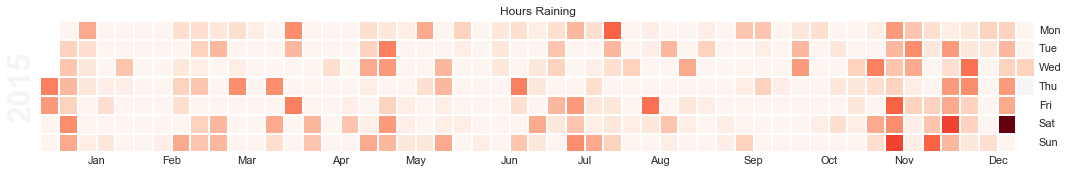

In [30]:
# lets plot the heatmap i.e. Plot a timeseries as a calendar heatmap.
fig, ax = calmap.calendarplot(temp['hours_raining'], fig_kws={"figsize":(15,5)})
plt.title("Hours Raining")


Text(0.5,1,'Total Rainfall Daily')

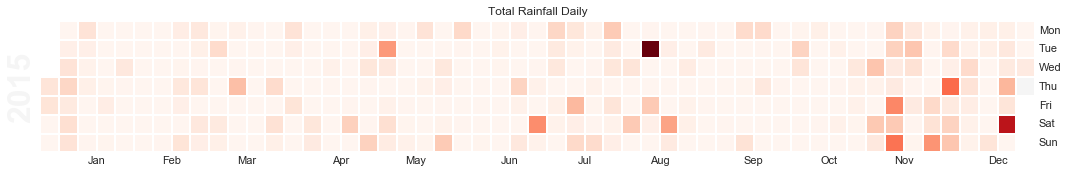

In [31]:

fig, ax = calmap.calendarplot(temp['total_rain'], fig_kws={"figsize":(15,5)})
plt.title("Total Rainfall Daily")

# NOTE: 
# If the data points have outliers, they will skew your color mapping considerably. Thus we should eliminate the outliers for 
# better visualization of the heatmap. 

# Quick pandas exploratory line plots

             rain  rain_amount  total_rain  wet_cycle  hours_raining
date                                                                
2015-01-01   True         52.2         4.6       True           10.0
2015-01-02   True         52.0         4.8      False            8.0
2015-01-03  False          0.0         0.0      False            0.0
2015-01-04  False          0.0         0.0      False            0.0
2015-01-05  False          0.0         0.0      False            0.0


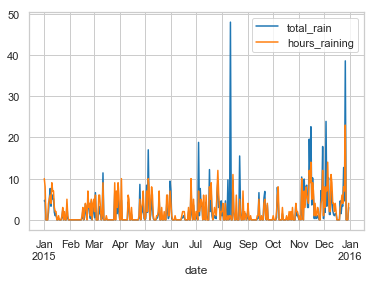

In [32]:
print(temp.head())
temp[['wet_cycle', 'total_rain', 'hours_raining']].plot()


### Reference: https://www.shanelynn.ie/analysis-of-weather-data-using-pandas-python-and-seaborn/